<a href="https://colab.research.google.com/github/sheikhmishi2001-commits/loan_approval_project/blob/main/loan_approval_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE

In [28]:
# Load Dataset
df = pd.read_csv("loan_approval_dataset.csv")

print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (4269, 13)
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \


In [29]:
#Clean Column Names (remove extra spaces)
df.columns = df.columns.str.strip()
print("Cleaned Columns:\n", df.columns)


Cleaned Columns:
 Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [30]:
#Check Missing Values
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [31]:
# Fill missing values (numerical → median, categorical → mode)
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)
print("\nMissing Values After Filling:\n", df.isnull().sum())


Missing Values After Filling:
 loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


/tmp/ipython-input-971584871.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-971584871.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [32]:
# Encode Categorical Variables
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

In [33]:
print("Columns in dataset:\n", df.columns)


Columns in dataset:
 Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [34]:
#  Features & Target
# (Assuming target column is "Loan_Status" → adjust if named differently)
X = df.drop("loan_status", axis=1)
y = df["loan_status"]
print("Features Shape:", X.shape)
print("Target Shape:", y.shape)

Features Shape: (4269, 12)
Target Shape: (4269,)


In [35]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nClass distribution before SMOTE:\n", y_train.value_counts())


Class distribution before SMOTE:
 loan_status
0    2125
1    1290
Name: count, dtype: int64


In [36]:
# Handle Class Imbalance (SMOTE)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [37]:
# Train Models
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_res, y_train_res)
y_pred_log = log_reg.predict(X_test)

In [38]:
# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_res, y_train_res)
y_pred_tree = dtree.predict(X_test)

In [39]:
# Evaluation
print("\n=== Logistic Regression Report ===\n")
print(classification_report(y_test, y_pred_log))

print("\n=== Decision Tree Report ===\n")
print(classification_report(y_test, y_pred_tree))


=== Logistic Regression Report ===

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       531
           1       0.76      0.73      0.75       323

    accuracy                           0.81       854
   macro avg       0.80      0.80      0.80       854
weighted avg       0.81      0.81      0.81       854


=== Decision Tree Report ===

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       531
           1       0.98      0.97      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



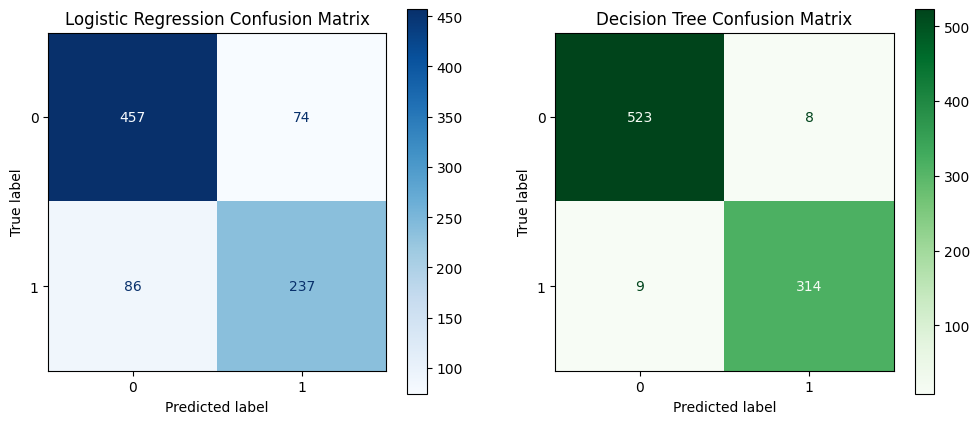

In [40]:
# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, ax=axes[0], cmap="Blues")
axes[0].set_title("Logistic Regression Confusion Matrix")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, ax=axes[1], cmap="Greens")
axes[1].set_title("Decision Tree Confusion Matrix")

plt.show()


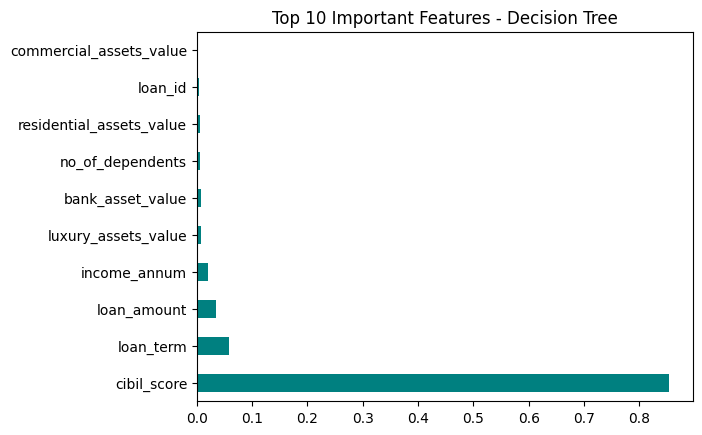


✅ Project Completed Successfully!


In [41]:
#  Feature Importance (Decision Tree)
feat_importances = pd.Series(dtree.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color="teal")
plt.title("Top 10 Important Features - Decision Tree")
plt.show()

print("\n✅ Project Completed Successfully!")